In [12]:
import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
StockPrice = pd.read_excel("STOCKPRICE.xlsx")

In [83]:
i = 1

In [84]:
stockSymbols = ['ADANIPORTS',
'ASIANPAINT',
'AXISBANK',
'BAJAJFINSV',
'BAJFINANCE',
'BPCL',
'BRITANNIA',
'CIPLA',
'COALINDIA',
'DRREDDY',
'EICHERMOT',
'GAIL',
'GRASIM',
'HCLTECH',
'HDFC',
'HDFCBANK',
'HEROHONDA',
'HEROMOTOCO',
'HINDALCO',
'HINDUNILVR',
'ICICIBANK',
'INDUSINDBK',
'INFRATEL',
'INFY',
'IOC',
'ITC',
'JSWSTEEL',
'KOTAKBANK',
'LT',
'M&M',
'MARUTI',
'NESTLEIND',
'NTPC',
'ONGC',
'POWERGRID',
'RELIANCE',
'SBIN',
'SESAGOA',
'SHREECEM',
'SUNPHARMA',
'TATAMOTORS',
'TATASTEEL',
'TCS',
'TECHM',
'TITAN',
'ULTRACEMCO',
'UPL',
'VEDL',
'WIPRO',
'ZEEL'
]

In [85]:
sbin = StockPrice[StockPrice.Symbol == stockSymbols[i]]
print(sbin.head())

           Date      Symbol   Open   Close  Volume    VWAP
2197 2000-01-03  ASIANPAINT  370.0  381.65    3318  380.54
2198 2000-01-04  ASIANPAINT  380.0  385.55    4818  383.50
2199 2000-01-05  ASIANPAINT  371.5  383.00    2628  379.81
2200 2000-01-06  ASIANPAINT  384.9  377.50    3354  379.88
2201 2000-01-07  ASIANPAINT  376.0  385.70    9589  383.38


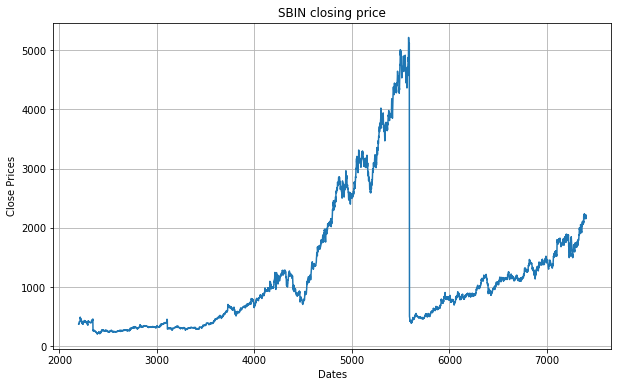

In [86]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(sbin['Close'])
plt.title('SBIN closing price')
plt.show()

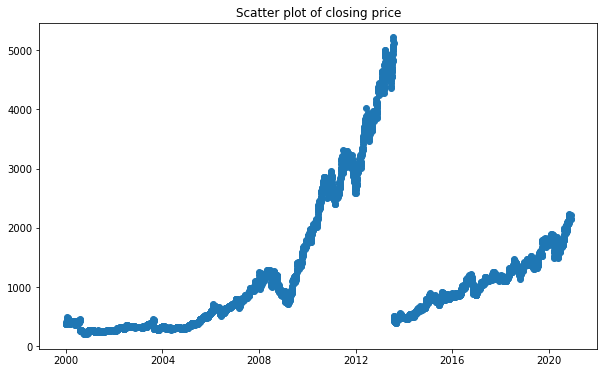

In [87]:
plt.figure(figsize=(10,6))
df_close = sbin['Close']
plt.scatter(sbin.Date,df_close)
plt.title('Scatter plot of closing price')
plt.show()

In [88]:
type(df_close)

pandas.core.series.Series

ValueError: `bins` must increase monotonically, when an array

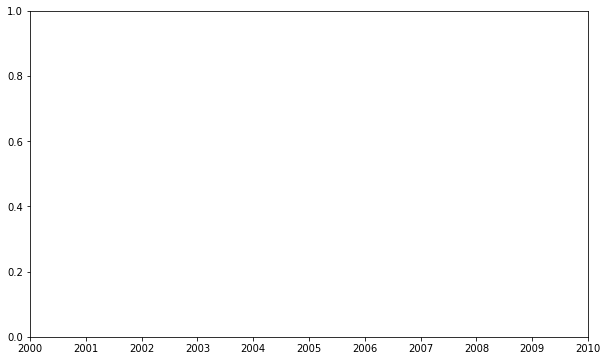

In [89]:
plt.figure(figsize=(10,6))
df_close = sbin['Close']
plt.hist(sbin.Date,df_close)
plt.title('Hisogram of closing price')
plt.show()

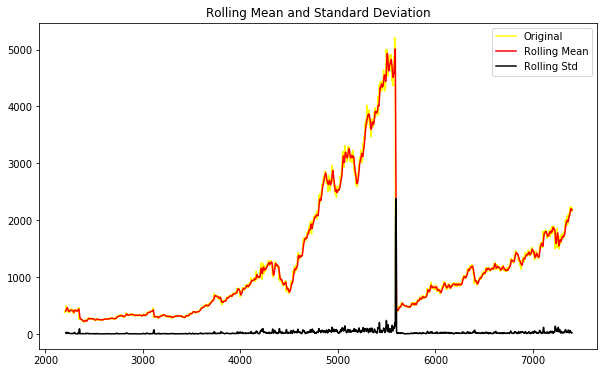

Results of dickey fuller test
Test Statistics                  -2.189327
p-value                           0.210142
No. of lags used                  9.000000
Number of observations used    5194.000000
critical value (1%)              -3.431610
critical value (5%)              -2.862097
critical value (10%)             -2.567066
dtype: float64


In [90]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(sbin['Close'])

<Figure size 720x432 with 0 Axes>

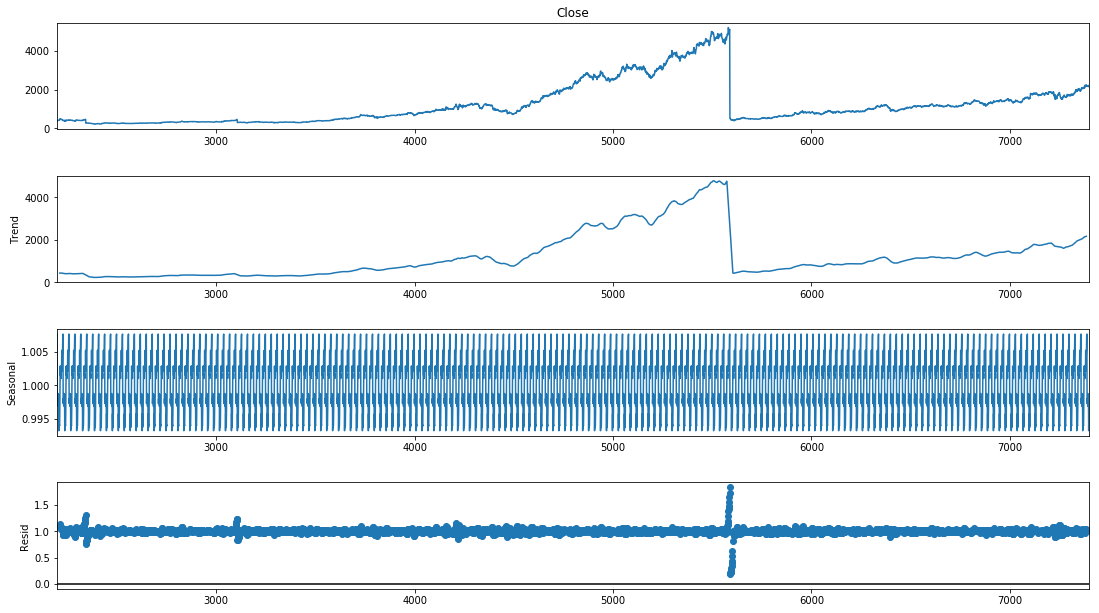

In [91]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


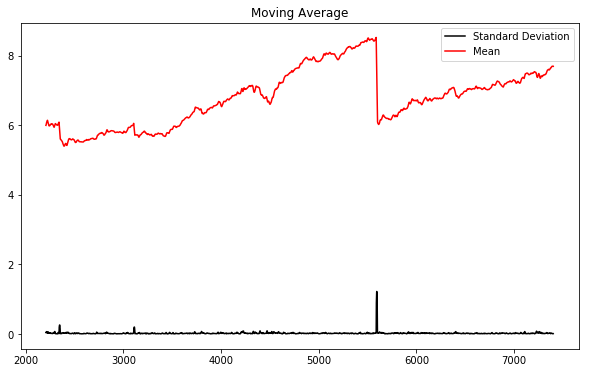

In [92]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(sbin['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

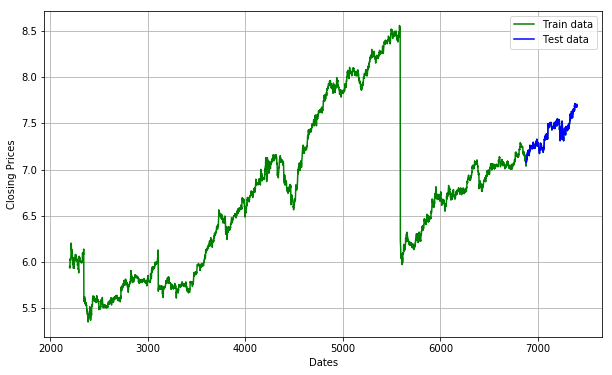

In [93]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [94]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17093.434, Time=0.52 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17091.527, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17091.527, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17095.262, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17089.367, Time=0.62 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.805 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4680
Model:               SARIMAX(0, 1, 0)   Log Likelihood                8548.631
Date:                Sun, 18 Apr 2021   AIC                         -17095.262
Time:                        20:27:35   BIC                         -17088.811
Sample:                             0   HQIC                        -17092.993
                               - 4680                             

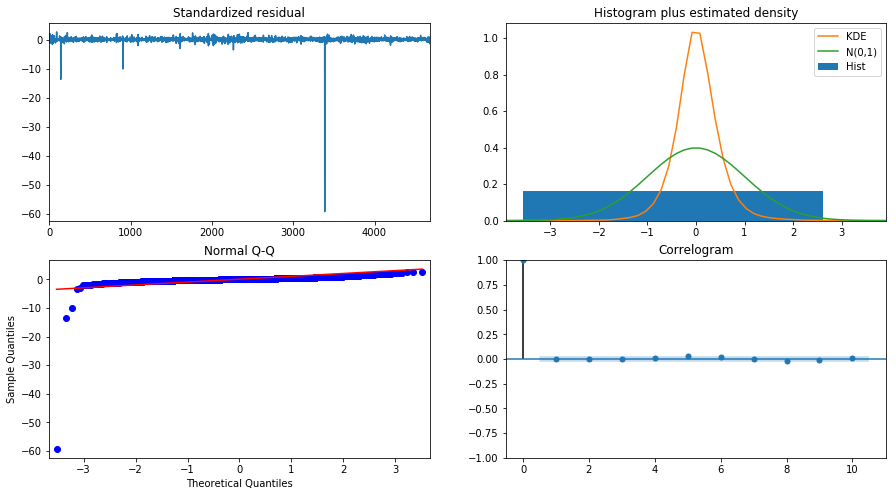

In [95]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [97]:
model = ARIMA(train_data, order=(1,1,1))
fitted = model.fit(disp=-1)
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4679
Model:                 ARIMA(1, 1, 1)   Log Likelihood                8548.790
Method:                       css-mle   S.D. of innovations              0.039
Date:                Sun, 18 Apr 2021   AIC                         -17089.581
Time:                        20:28:03   BIC                         -17063.777
Sample:                             1   HQIC                        -17080.507
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.001      0.407      0.684      -0.001       0.001
ar.L1.D.Close     0.8520      0.281      3.033      0.002       0.301       1.403
ma.L1.D.Close    -0.8490      0.283     

In [98]:
# Forecast

fc, se, conf = fitted.forecast(len(test_data), alpha=0.05)  # 95% confidence

In [124]:
np.exp(np.mean(se)**2)

1.4412896120905991

In [99]:
len(test_data)

521

In [100]:
len(fc)

521

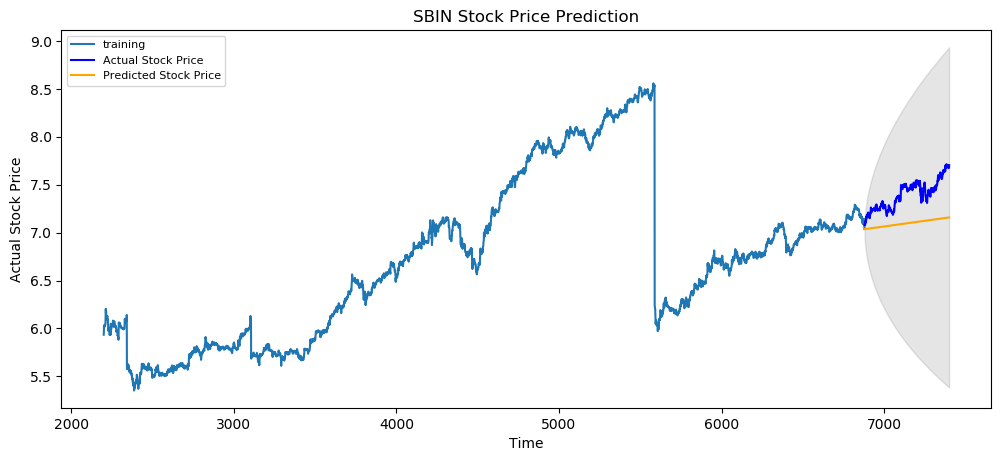

In [101]:
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('SBIN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [74]:
fc_series.head()

1977    5.964720
1978    5.965187
1979    5.965654
1980    5.966120
1981    5.966587
dtype: float64

In [78]:
np.exp(1.3862943611198906)

4.0

In [114]:
fc_series-test_data

6880   -0.041703
6881   -0.052708
6882   -0.044504
6883   -0.049248
6884   -0.049359
6885   -0.077346
6886   -0.066917
6887   -0.090461
6888   -0.087929
6889   -0.083284
6890   -0.093103
6891   -0.127982
6892   -0.114733
6893   -0.119288
6894   -0.146447
6895   -0.144530
6896   -0.146587
6897   -0.139419
6898   -0.135150
6899   -0.148116
6900   -0.140462
6901   -0.166589
6902   -0.158998
6903   -0.147244
6904   -0.166494
6905   -0.163036
6906   -0.157403
6907   -0.150237
6908   -0.150041
6909   -0.123593
          ...   
7371   -0.483602
7372   -0.506477
7373   -0.504257
7374   -0.497187
7375   -0.506595
7376   -0.487410
7377   -0.542046
7378   -0.524253
7379   -0.554077
7380   -0.547553
7381   -0.529685
7382   -0.521038
7383   -0.527647
7384   -0.558654
7385   -0.545264
7386   -0.552313
7387   -0.540573
7388   -0.532098
7389   -0.527314
7390   -0.530824
7391   -0.532719
7392   -0.533878
7393   -0.537338
7394   -0.521473
7395   -0.523478
7396   -0.532294
7397   -0.541912
7398   -0.5171

In [ ]:
np.mean(fc_series[1] - )